In [58]:
# 미분 : 
# 분산 : (sigma(관측치 - 평균)^2) / n-1
# 표준편차 : root(분산)
# 공분산 : sigma((x-xbar)*(y-ybar)) / n-1
# 상관계수 : 공분산 / (xsigma * ysigma) : -1 ~ 1 사이값
# 벡터 거리값 : root(각 요소 차의 제곱 합)
# model 평가 : MSE(mean square error) 연속된 수치인 경우의 평가
#             RMSE(root MSE)
# 신경망에서 cost function 비용함수 : (예측치 - 관측치) 
#                 => back propagation( 역전파를 통해서 가중치를 수정 )

# ex문제 : 국어 , 수학 점수 vector 간에 상관계수가 1이다 
#       => 국어점수가 올라가면 수학점수도 높다
#          내적이 1이다 : 국어점수가 올라가면 수학점수도 높다
#       ===> 내적과 상관계수는 유사함 ( 내적이 더 편하므로 선형대수에서 내적을 다룸 )

# 회귀분석
# - 다중공선성 : 독립변수간에 영향이 있으면 종속변수가 과하게 영향을 받을 수 있음
# - 회귀분석에서 자기상관성(autocorelation)이 존재하는 경우 => 시계열분석을 해야함
# - 시계열분석에서 가장 기초 : ARMA( Autocorelation + Moving Average ) 
#     - 이동평균법 ( 복잡하면 분석불가 => 주파수를 줄여줌 )
#     - 단점 : 자기상관성이 있음 => 오늘 데이터가 내일 데이터에 영향을 미침
#     - 정상성을 띠는 데이터에만 가능 => 실제로 정상성을 띠는 데이터가 거의 없음 
#     - 비정상성을 정상성으로 바꾸는게 필요  => ARIMA
# - ARIMA ( Autocorelation + Intregrated +  Moving Average) : 통합 => 비정상성 데이터도 가능
#
# - pandas는 시계열 분석을 지원함 ( 시간 index를 지원함 )
#

In [59]:
import numpy as np
from statistics import *
x = np.array([7,8,9])
y = np.array([9,10,20])
print(y.mean())  # 통계 : 중위수(medians)사용  ==> 중위수는 이상치의 영향을 받지 않음
#공분산 행렬
print("공분산 : \n", np.cov(x,y))
#상관계수행렬( 2x2 )
print("상관계수 :\n", np.corrcoef(x,y))

13.0
공분산 : 
 [[ 1.   5.5]
 [ 5.5 37. ]]
상관계수 :
 [[1.         0.90419443]
 [0.90419443 1.        ]]


In [62]:
arr = np.array([[1,2,3],[4,5,6],[7,8,9]])
print("원본 : \n", arr)
print("누적합 : \n", arr.cumsum(1))
print("누적합 : \n", arr.cumsum(0))
print("누적곱(열) : \n", arr.cumprod(1))
print("배열의 합계 =", arr.sum())
print("열방향으로 평균(행평균) = ", arr.mean(axis=1))
print("행방향으로의 합계 = ", arr.sum(0))

원본 : 
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
누적합 : 
 [[ 1  3  6]
 [ 4  9 15]
 [ 7 15 24]]
누적합 : 
 [[ 1  2  3]
 [ 5  7  9]
 [12 15 18]]
누적곱(열) : 
 [[  1   2   6]
 [  4  20 120]
 [  7  56 504]]
배열의 합계 = 45
열방향으로 평균(행평균) =  [2. 5. 8.]
행방향으로의 합계 =  [12 15 18]


In [61]:
# 가중치( 변수 중요도를 부여) 부여

a = np.array([1,2,3,4])
wts = np.array([4,3,2,1])
print(np.average(a,weights = wts))  
# weight로 가중치 부여 => 1,2,3,4 각각에 4의 중요성 3의 중요성 2의 중요성 등 부여
# 데이터의 중요정도 부여하는 것


std = np.sqrt(np.mean(abs(a-a.mean())**2)) # 표준편차
print(np.var([1,2,3,4]))  # 분산
print(np.std([1,2,3,4])) # 표준편차

2.0
1.25
1.118033988749895


data1 : mean= 100.776 stdv = 19.620
data2 : mean= 151.050 stdv = 22.358


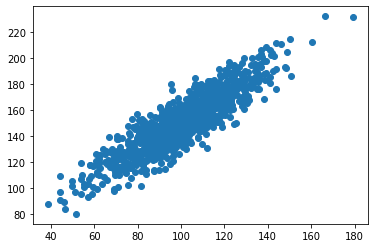

In [20]:
# matplotlib, seaborn, pandas.plot
# - 기본적으로 matplotlib로 구성됨
# - jupyter에서는 matplotlib inline을 사용해야 출력됨
# - 

%matplotlib inline
from numpy import mean
from numpy import std
from numpy.random import randn   # 서브 패키지 : linalg, random, fit(푸리에 변환) , poly(다차방정식) 등등 
from numpy.random import seed #random : 의사난수) 데이터 출력 순서가 정해진 난수 => seed 설정을 하면 시작 지점이 같으므로 항상 같은 수가 나옴 
from matplotlib import pyplot
seed(1)  #같은 수가 발생 ( 시작 점이 같음 )
data1 = 20 * randn(1000) + 100  # randn 정규분포
data2 = data1 + (10 * randn(1000) + 50)
print("data1 : mean= %.3f stdv = %.3f" % (mean(data1), std(data1)))
print("data2 : mean= %.3f stdv = %.3f" % (mean(data2), std(data2)))
pyplot.scatter(data1, data2)  # 산포도 
pyplot.show()

In [32]:
import matplotlib.pyplot as plt
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


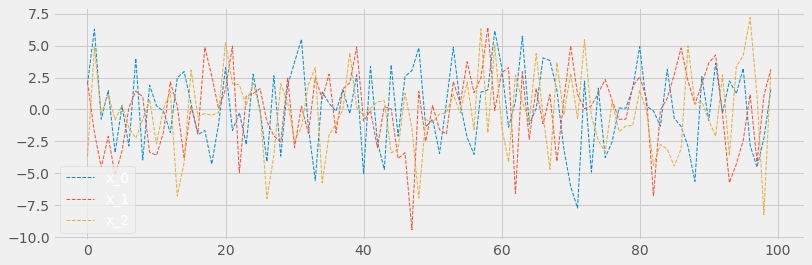

In [89]:
plt.style.use(['fivethirtyeight'])
xs = np.random.normal(0, 3, (100, 3))  # 평균 0, 표준편차3인 100x3데이터 생성
plt.figure(figsize= (12,4)) # 모양 결정 
for i in range(0, 3) :
    x = xs[:,i]
    plt.plot(range(0, len(x)), x , linewidth = 1, linestyle ='--',
                   label ="x_{}".format(i))
plt.legend()  # 범례
plt.grid(True) # 격자선 : True or False
plt.show()

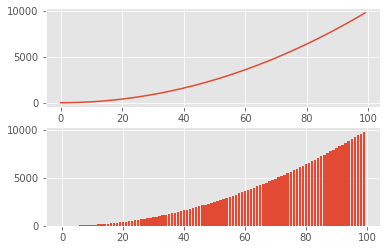

In [39]:
fig = plt.figure()
#화면 얻기
ax1 = fig.add_subplot(2 , 1, 1)  # 2행 1열 중 1번째
ax2 = fig.add_subplot(2, 1, 2)   # 2행 1열 중 2번째

#데이터 생성
x = range(0, 100)
y = [v*v for v in x]

#출력
ax1.plot(x,y)
ax2.bar(x,y)
plt.title("Plot")
plt.show()

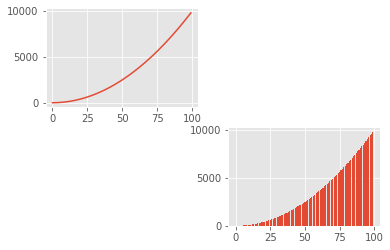

In [41]:
fig = plt.figure()
#화면 얻기
ax1 = fig.add_subplot(2 , 2, 1)  # 2행 2열 중 1번째
ax2 = fig.add_subplot(2, 2, 4)   # 2행 2열 중 4번째

#데이터 생성
x = range(0, 100)
y = [v*v for v in x]

#출력
ax1.plot(x,y)
ax2.bar(x,y)
plt.title("Plot")
plt.show()

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]
[0.         0.04081633 0.08163265 0.12244898 0.16326531 0.20408163
 0.24489796 0.28571429 0.32653061 0.36734694 0.40816327 0.44897959
 0.48979592 0.53061224 0.57142857 0.6122449  0.65306122 0.69387755
 0.73469388 0.7755102  0.81632653 0.85714286 0.89795918 0.93877551
 0.97959184 1.02040816 1.06122449 1.10204082 1.14285714 1.18367347
 1.2244898  1.26530612 1.30612245 1.34693878 1.3877551  1.42857143
 1.46938776 1.51020408 1.55102041 1.59

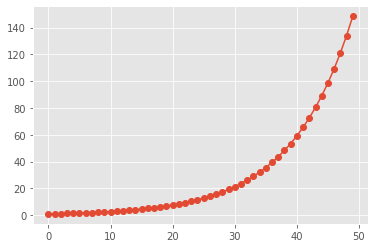

In [46]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)  
print(x1)
print(x2)
plt.plot(np.exp(x1) , 'o-')  #지수함수의 그래프
plt.show()

AxesSubplot(0.125,0.536818;0.775x0.343182)
AxesSubplot(0.125,0.125;0.775x0.343182)


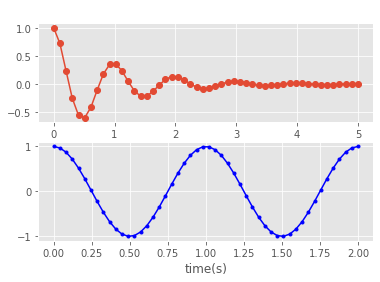

In [49]:
y1 = np.cos(2*np.pi * x1) * np.exp(-x1)
y2 = np.cos(2*np.pi * x2)
ax1 = plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title("subplots")
print(ax1)

ax2 = plt.subplot(2,1,2)
plt.plot(x2, y2, 'b.-')
plt.xlabel("time(s)")
print(ax2)
plt.show()

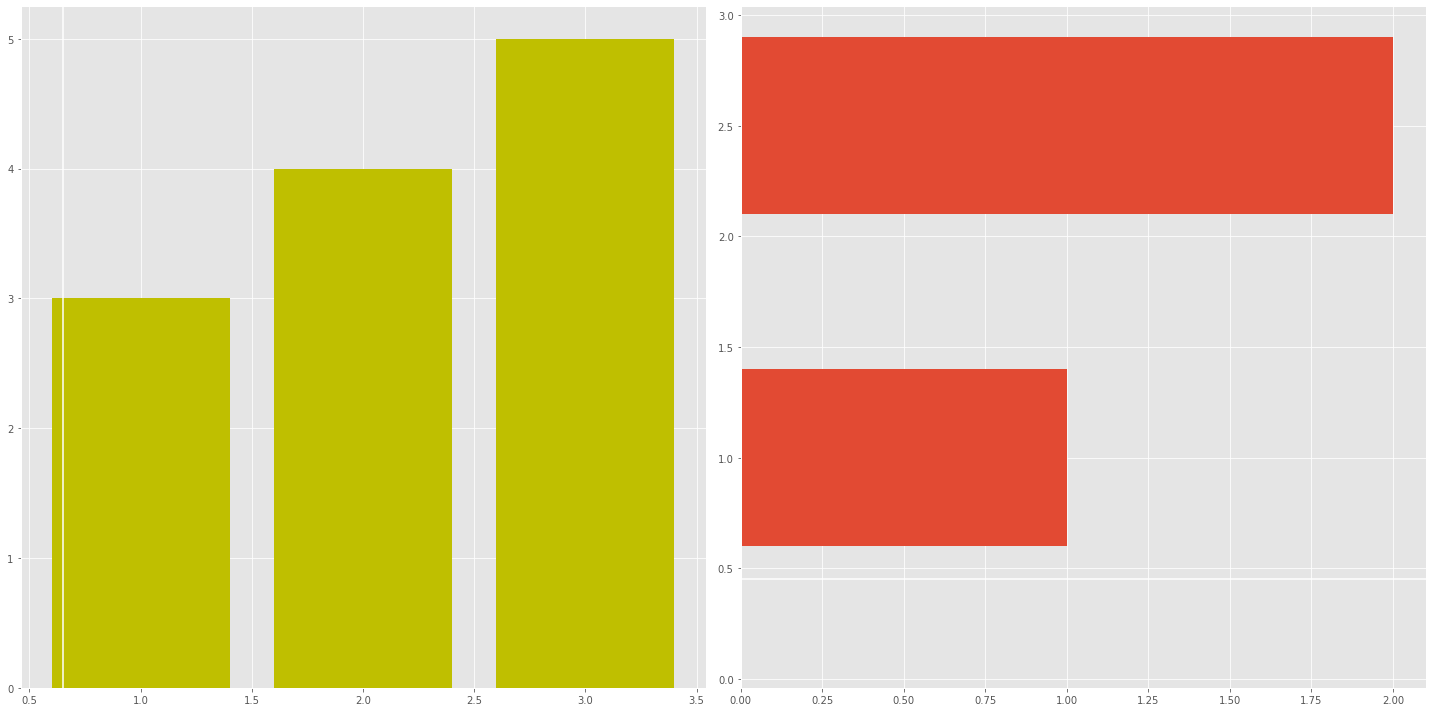

In [57]:
fig = plt.figure(figsize = (20, 10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar([1,2,3],[3,4,5], color = "y")
ax2.barh([0.5,1,2.5],[0,1,2])  # v : vertical 수직 /  h : horizontal 수평
ax1.axvline(0.65)
ax2.axhline(0.45)
plt.tight_layout()  # 여백을 줄여서 표현
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1d85ed1bc48>,
 'caps': [<matplotlib.lines.Line2D at 0x1d85ed15c08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d85ed1b2c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1d85ed0fb88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d85ed0fc88>],
 'means': []}

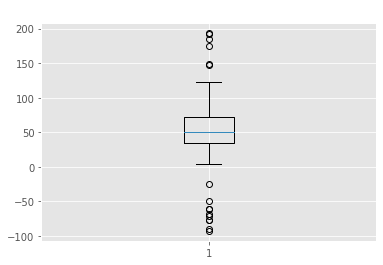

In [73]:
# boxplot
# IQR(inter quantile range == 3사분위수 - 1사분위수)
# IQR * +- 1.5 : 상하한선
np.random.seed(19680801)
spread = np.random.rand(50) * 100   # 분포
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100  #상한선  넘는 데이터
flier_low = np.random.rand(10) * -100    #하한선 넘는 데이터
data = np.concatenate((spread, center, flier_high, flier_low))  #데이터를 병합
fig1, ax1 = plt.subplots()   # 형태를 제어, 도화지
ax1.set_title('boxplot') #도화지에 title 작성
ax1.boxplot(data)  #도화지에 boxplot 그림

{'whiskers': [<matplotlib.lines.Line2D at 0x1d85e940e48>,
 'caps': [<matplotlib.lines.Line2D at 0x1d85e940fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d85e940688>],
 'medians': [<matplotlib.lines.Line2D at 0x1d85e955e48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d85e97e9c8>],
 'means': []}

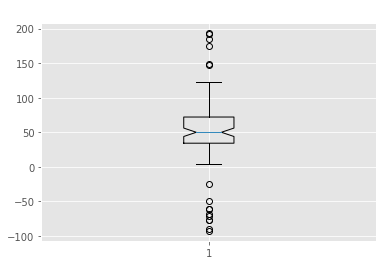

In [79]:
fig2, ax2 = plt.subplots()
ax2.set_title('Notched boxes')  # 홈이 생김 ( 95% 신뢰구간 )
ax2.boxplot(data, notch = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d85ea0d288>,
 'caps': [<matplotlib.lines.Line2D at 0x1d85e677688>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d85ea23e48>],
 'medians': [<matplotlib.lines.Line2D at 0x1d85ea2c208>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d85ec33c88>],
 'means': []}

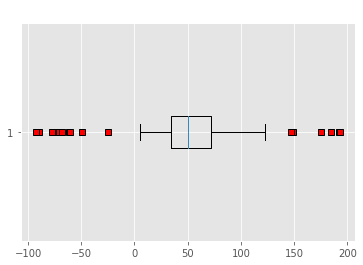

In [82]:
red_square = dict(markerfacecolor = 'r', marker='s')  # marker : square
fig5, ax5 = plt.subplots()
ax5.set_title("horizontal")
ax5.boxplot(data , vert=False, flierprops = red_square) # flierprops : 이상치 표현 제어
                  # vert : vertical False ==> 수평으로 출력

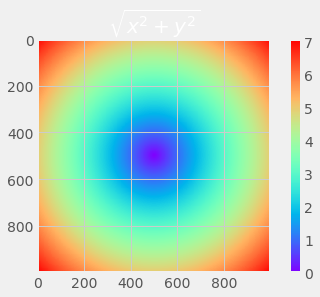

In [93]:
# meshgrid  : 그물망 격자

points = np.arange(-5, 5, 0.01)
xs, ys = np.meshgrid(points, points)
z = np.sqrt(xs**2 + ys**2)  # 중심으로부터의 거리값 

#팔레트 : 
plt.imshow(z, cmap = plt.cm.rainbow)  # imshow : 데이터를 이미지로 출력
plt.colorbar()  # 컬러별 수의 크기값 출력
plt.title("$\sqrt{x^2+y^2}$") ## 그래프에 수식 : latex 문법  : $ $ 사이에 수식을 쓰면 가능함
plt.show()


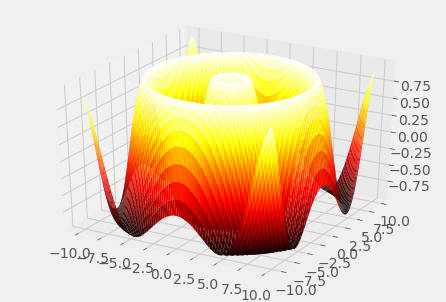

In [105]:
# 3차원 :  Axes3D
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)  #도화지
X = np.arange(-10, 10, 0.25)
Y = np.arange(-10, 10, 0.25)
X,Y = np.meshgrid(X,Y)  # 좌표점
R = np.sqrt(X**2+Y**2)  # 거리값
#Z= R
Z= np.sin(R)

ax.plot_surface(X,Y,Z, rstride= 1, cstride =1, cmap ='hot')  #r : row/ c : column   == 간격
plt.show()
ax.plot_surface(X,Y,Z, rstride=1, cstride= 1, cmap = plt.cm.rainbow)
plt.show()

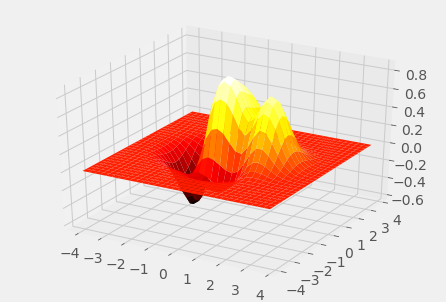

In [111]:
from mpl_toolkits.mplot3d import Axes3D
# 방정식
def f(x,y) : return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)
fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X,Y = np.meshgrid(X,Y)  # 좌표점
Z = np.sin(f(X,Y))
ax.plot_surface(X,Y,Z, rstride= 1, cstride =1, cmap ='hot')  #r : row/ c : column   == 간격
plt.show()


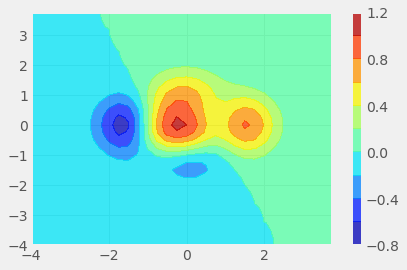

In [121]:
plt.contourf(X,Y,f(X,Y),8, alpha=.75, cmap='jet')
plt.colorbar()
plt.show()

[1 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0]


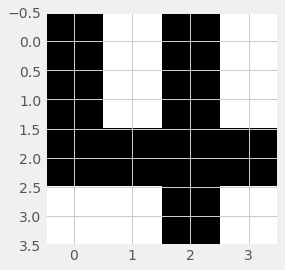

In [125]:
a = [1,0,1,0,
     1,0,1,0,
     1,1,1,1,
     0,0,1,0]
np1 = np.array(a)
print(np1)
plt.imshow(np1.reshape(4,4), cmap="Greys", interpolation ="nearest")
# 보간법 : 컬러값이 지정이되지 않으면 보간해서 적용( interpolation )
plt.show()

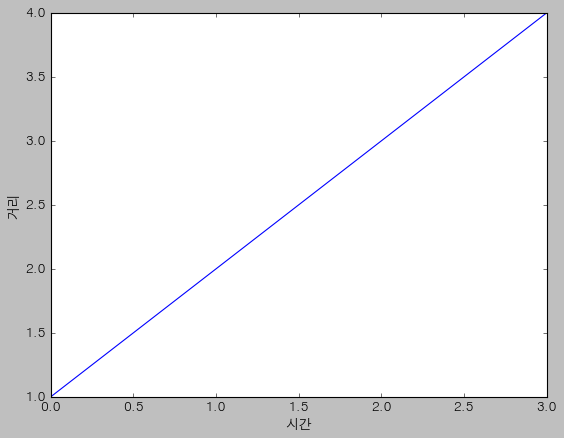

In [128]:
%matplotlib inline
from matplotlib import font_manager,rc
import matplotlib
import matplotlib.pyplot as plt

plt.style.use(['classic'])
font_path = "C:/Windows/Fonts/H2GTRM.TTF"
font_name = font_manager.FontProperties(fname=font_path).get_name() #폰트이름을 가져옴
matplotlib.rc("font",family=font_name)  #rc : resource configuration : 폰트이름 
plt.plot([1,2,3,4])
plt.xlabel("시간")
plt.ylabel("거리")
plt.show()

[  38  107   83  133  138  215  158   78   84   83   29   72    5  -47
   35  -32   40   78   58  154   95   36    1  -75  -95  -33   62   40
   15  -33 -126  -85    4   95   30   77   54  -31 -108 -107 -207 -242
 -189 -150 -171 -267 -323 -320 -222 -150]


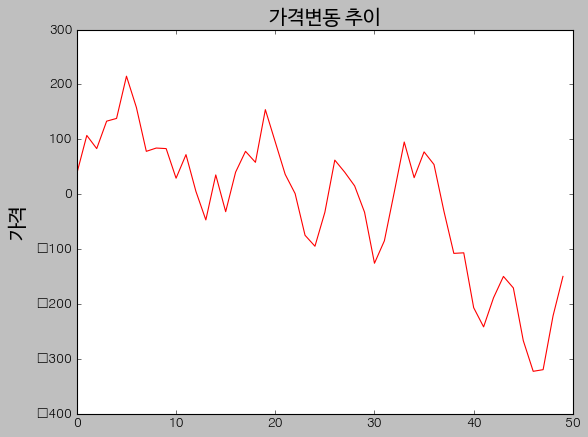

In [131]:
import matplotlib.font_manager as fm

path = "C:\\Windows\\Fonts\\NanumBarunGothic.ttf"
fontprop = fm.FontProperties(fname = path, size = 18)
data = np.random.randint(-100, 100, 50).cumsum()
print(data)
plt.plot(range(50), data, 'r')
plt.title("가격변동 추이", fontproperties = fontprop)
plt.ylabel("가격", fontproperties=fontprop)
plt.show()

Text(0, 0.5, 'Y')

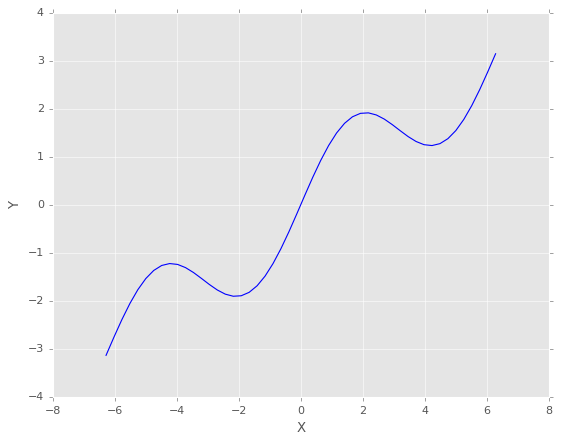

In [134]:
from pylab import plt
plt.style.use('ggplot')
import matplotlib as mpl
mpl.rcParams['font.family'] = '바탕'
def f(x) :
    return np.sin(x) + 0.5 * x  # sin : 주기함수
x = np.linspace(-2 *np.pi , 2*np.pi, 50)  
plt.plot(x, f(x), 'b')
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')

Text(0, 0.5, 'f(x)')

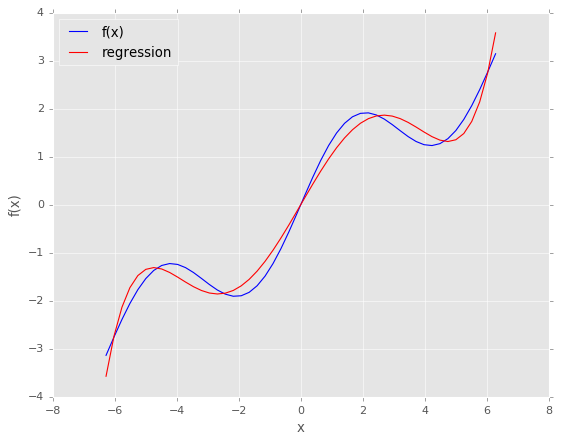

In [136]:
# 최소제곱법을 이용한 fitting( 적합 )  
# polyfit : 다차방정식으로 fitting(적합) : 계수를 찾아내는 것
reg = np.polyfit(x, f(x), deg= 5)  #deg:5  ==> 5차 방정식으로 fitting   reg : 계수
ry = np.polyval(reg,x)  # 5차방정식으로 회귀
plt.plot(x, f(x), 'b', label ='f(x)') # 원본 데이터
plt.plot(x ,ry , 'r', label = 'regression') # 최소제곱법으로 fitting된 데이터
plt.legend(loc =0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')


In [165]:
import folium
map_1 = folium.Map(location=[37.565711, 126.978090],
                  zoom_start = 16,
                  tiles = 'Stamen Terrain')
#위도, 경도 좌표
folium.Marker([37.565711, 126.978090], popup ='서울시청').add_to(map_1)
folium.Marker([37.565711, 126.978090], popup ='서울시청및',
             icon = folium.Icon(icon = 'cloud')).add_to(map_1)
map_1

In [228]:
# 숙제 : 서울 소재 10개 대학의 좌표를 출력하세요

place ={'서울대학교' : [37.462823, 126.951908],
        '연세대학교' : [37.565912, 126.938561],
        '고려대학교' : [37.590952, 127.027809],
        '건국대학교' : [37.590952, 127.027809],
        '성균관대학교':[37.588355, 126.993638],
        '서강대학교' : [37.551148, 126.941013],
        '한양대학교' : [37.557411, 127.045322],
        '이화여자대학교':[37.559875, 126.945523],
        '홍익대학교' : [37.551683, 126.924975],
        '숙명여자대학교':[37.546628, 126.964842]}

import pandas as pd
map_2 = folium.Map(location = [37.565912, 126.938561])

                   

    
for i in range(len(place_list)) :
    folium.Marker(place_list[i], popup = place_name[i], icon = folium.Icon(icon='cloud')).add_to(map_2)

map_2
    

In [196]:
for i in range(10) :
    folium.Marker(place_list[i], popup = place_name[i], icon = folium.Icon(icon='cloud')).add_to(map_2)

NameError: name 'map_2' is not defined

In [187]:
place_list
list(place_name)

['서울대학교',
 '연세대학교',
 '고려대학교',
 '건국대학교',
 '성균관대학교',
 '서강대학교',
 '한양대학교',
 '이화여자대학교',
 '홍익대학교',
 '숙명여자대학교']

In [224]:
import pandas as pd

map_2 = folium.Map(location = [mean(place_list)])

TypeError: can't convert type 'list' to numerator/denominator

In [200]:
mean(place_list)

TypeError: can't convert type 'list' to numerator/denominator

In [217]:
print(type(len(place_list)))

<class 'int'>


In [223]:
for i in range(len(place_list)):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [222]:
for i in 10:
    print(i)

TypeError: 'int' object is not iterable

In [225]:
place_list
for i in range(10) :
    

[[37.462823, 126.951908],
 [37.565912, 126.938561],
 [37.590952, 127.027809],
 [37.590952, 127.027809],
 [37.588355, 126.993638],
 [37.551148, 126.941013],
 [37.557411, 127.045322],
 [37.559875, 126.945523],
 [37.551683, 126.924975],
 [37.546628, 126.964842]]